# Project: Neural Networks - Bank Churn Prediction

## Description Background & Context

- Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

- Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months

## Data Description

- The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary:

* RowNumber: Row number.
* CustomerId: Unique identification key for different customers.
* Surname: Surname of the customer
* Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
* Geography: The country to which the customer belongs.
* Gender: The gender of the customer.
* Age: Age of the customer.
* Tenure: The period of time a customer has been associated with the bank.
* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
* NumOfProducts: How many accounts, bank account affiliated products the person has.
* HasCrCard: Does the customer have a credit card through the bank?
* IsActiveMember: Subjective, but for the concept
* EstimatedSalary: Estimated salary of the customer.
* Exited: Did they leave the bank after all?

### `Learning Outcomes:`

- Reading Dataset and Feature Elimination of unique features
- Exploratory Data Analysis
- Data Pre-processing
- Build Neural Network
- Model Performance Improvement. 
- Model Performance Evaluation on different performance metrics
- Insights & Recommendations


In [434]:
#################################################################################
# Project: Neural Networks - Classification                                    ##
# Bank Customer Churn Prediction                                               ##
# Submitted by "Bindu S Pillai"                                                ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 6/11/2021  ##
#################################################################################

# Importing necessary libraries for execution of the project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
#from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
#import keras
#from keras import backend as K
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


### Reading Dataset and Feature Elimination

In [435]:
# Loading file into Pandas dataframe.
file_in = "bank.csv"
bank_churn = pd.read_csv(file_in)

In [436]:
# Displaying top 10 rows of file
bank_churn.head(10) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#### Statistical Summary

In [437]:
# Data distribution and other metrics for different features
bank_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [438]:
#Information on the columns or features such as data types etc.
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [439]:
#Size of the data, no. of rows and  columns
bank_churn.shape

(10000, 14)

In [440]:
#Keeping original data for reference
bank_ch_orig=bank_churn.copy()

## Fixing the data types
- Checking for columns of object type, we can change them to categories.
-  converting "objects" to "category" reduces the data space required to store the dataframe and is treated as numeric for modelling requirement

In [441]:
#Converting columns with type 'Object' into categorical variables
txt1=''
for i in bank_churn.columns: 
    if bank_churn[i].dtype == 'object': 
        bank_churn[i] = pd.Categorical(bank_churn[i])
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 1001.7 KB


In [442]:
print("Number of unique values in each column")
bank_churn.nunique()

Number of unique values in each column


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [443]:
print("Missing values in each column")
bank_churn.isnull().sum()

Missing values in each column


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Insights
* There are no missing values in this dataset.

In [444]:
print("Number of unique values in each column")
bank_churn.nunique()

Number of unique values in each column


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Feature Elimination of Unique Features and others not relevant.

* RowNumber just indicates the unique serial number of rows. This can be dropped as its not useful information for model building.
* CustomerID is the unique identification of customer, it doesn't have any value in model building. So it can be dropped.
* Surname is another feature that can be dropped for obvious reasons. Name doesn't provide any insight into why they left.

In [445]:
## Dropping irrelevant features. Copying to new dataframe "bank_ch". So original datframe, 
## "bank_churn" is intact.
bank_ch=bank_churn.drop("RowNumber", axis =1)
bank_ch=bank_ch.drop("CustomerId", axis =1)
bank_ch=bank_ch.drop("Surname", axis =1)

#### Statistical summary in  a better format after eliminating unnecssary features.

In [446]:
# Again checking,metrics on the new dataframe such as standard deviation mean Quartiles etc, This is more readable now
bank_ch.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


**Observations-**   

* Customer age ranges from 18 to 92, both average and median almost same between 37-39.
* Credit score ranges from 350 to 850. Again both average and mode around 650. 
* Tenure ranges from 0 -10.  Again similar average and mode values around 5.
* Balance ranges from 0 -250,898.  Average 76.5K and mode is 97.2K. These are much lower than max balance.
* Most people have a credit card. Less than 25% don't have one.
* No. of products used by customers vary from 1-4. Most people have 2 prodcts
* Most people are active.  
* Estimated salary ranges from 12 to 200k. Most people have 100k or below. 

In [447]:
## Checking for value counts of categorical columns. How many of each value is there.
#Converting columns with type 'Object' into categorical variables
## Checking for value counts of categorical columns. How many of each value is there.
cat_cols=['Geography','Gender', 'Tenure', 'NumOfProducts','HasCrCard','IsActiveMember', 'Exited']
        
for column in cat_cols:
    print(bank_ch[column].value_counts())
    print('-'*30)


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
------------------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
------------------------------
0    7963
1    2037
Name: Exited, dtype: int64
------------------------------


**Observations-**   

* Majority class is 0 ("Not Exited") for Target variable, Exited.
* There are more Male customers than Female Customers
* Most customers have 1 or 2 products. Very few have 4. Having a credit card or not is almost a 50% to 50% split.
* Vast majority are active customers(79%). Least are Phd
* Low-income customers are majority, below $40K. 120k and above are a minority
* Most customers as expected (due to low-income) have the lowest rated card, blue. Platinum are just 20.
* Tenure is uniformly distributed till 9. Fewest customers have completed 10.

In [448]:
#checking the percentage of each class in the dataset
(bank_ch.Exited.value_counts())/(bank_ch.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* This shows an imbalance of classes. There are 79.63% of those 'Not Exited'(0) and only 20.73% 'Exited'(1). This means that we are aiming to predict anomalous events.

## EDA

## Univariate Analysis Boxplot and Histogram

In [449]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    

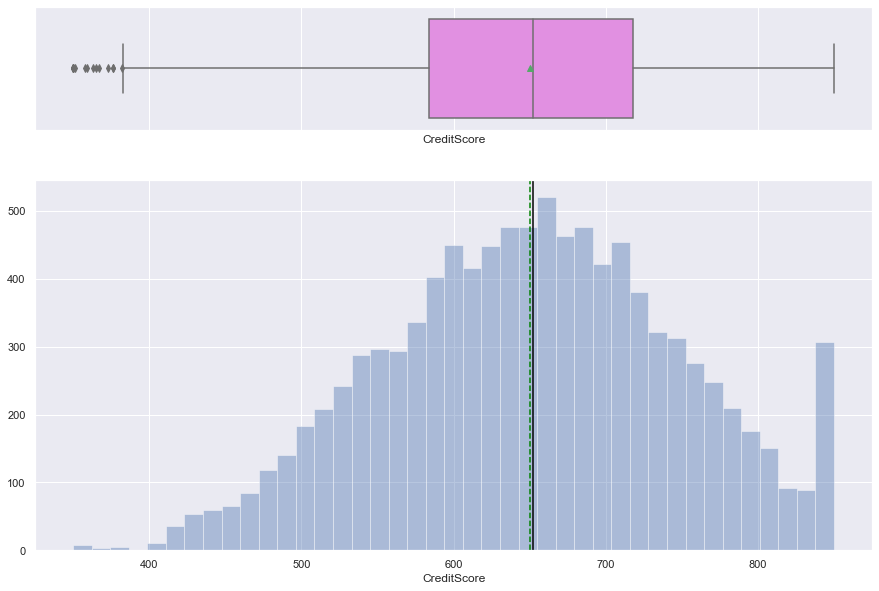

In [450]:
## Observations on Avg_Credit_Limit
histogram_boxplot(bank_ch["CreditScore"])

- As per the boxplot, there are only few outliers in 'Credit Score' variable on the lower end
- Credit Score has a fairly normal distribution with approx equal mean and median

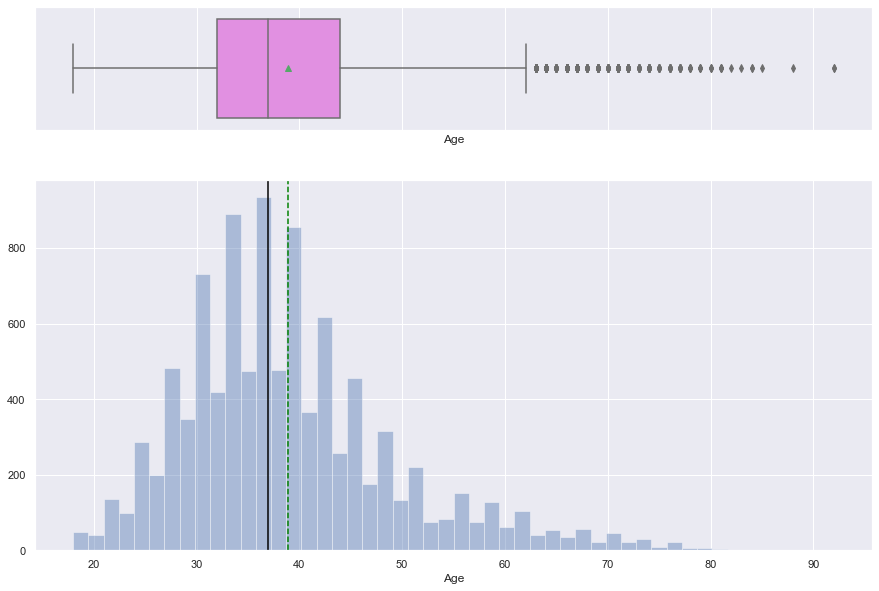

In [451]:
## Observations on Age
histogram_boxplot(bank_ch["Age"])

- As per the boxplot, there are many outliers for 'Age' variable on the higher end.
- Age has a fairly normal distribution except the small right tail with mean and median fairly close to each other

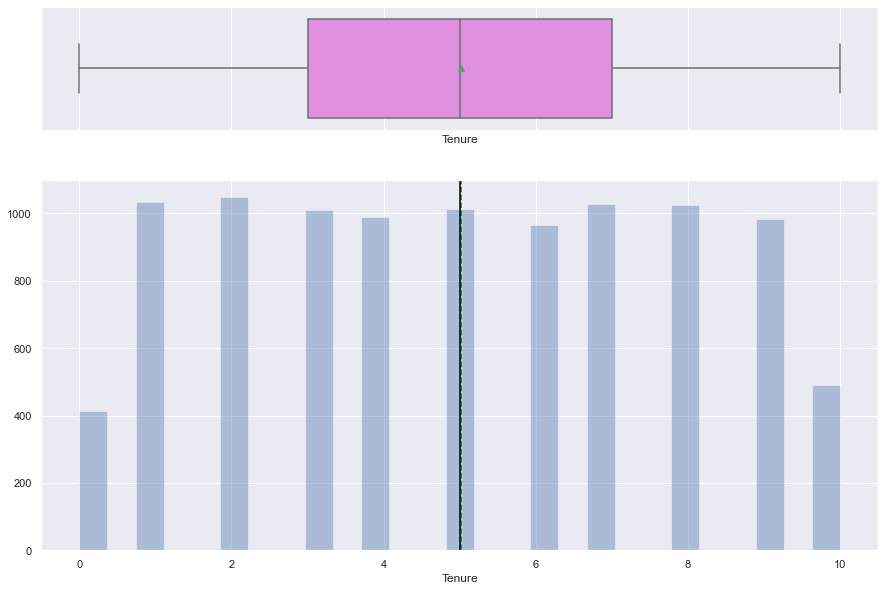

In [452]:
## Observations on Tenure
histogram_boxplot(bank_ch["Tenure"])

- As per the boxplot, no outliers for 'tenure'. Mean and mode align with each other
- Histogram shows unusual uniform distribution, which is kind oof interesting. Only the extreme end values have lower frequency and the rest have pretty much the same frequency.

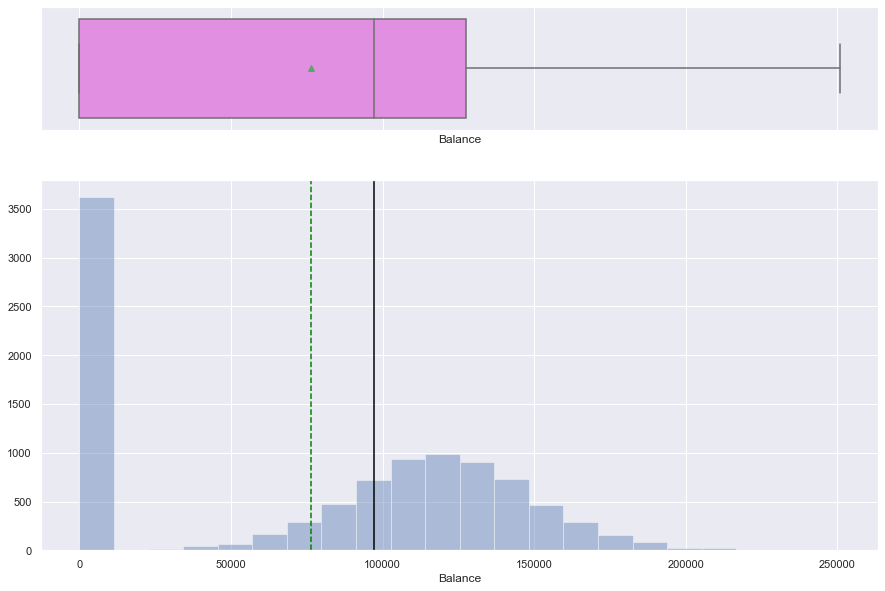

In [453]:
## Observations on Balance
histogram_boxplot(bank_ch["Balance"])

- The distribution for Balance is left skewed as per box plot. Lot of customers seem to have 0 or close to 0 balance in their account.
- The mean is around 75K and median is around 95K .
- There are no outliers.

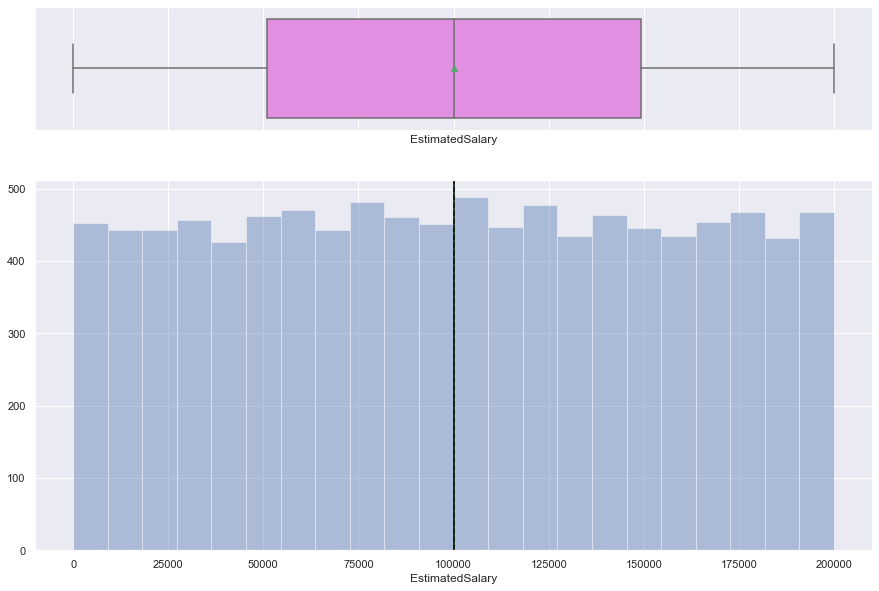

In [454]:
## Observations on EstimatedSalary
histogram_boxplot(bank_ch["EstimatedSalary"])

- Estimated Salary has a perfectly uniform distribution, which is little strange. All values have equal frequency with perfectly coinciding mean and mode and no outliers.

## Univariate Analysis - Count Plot

In [455]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

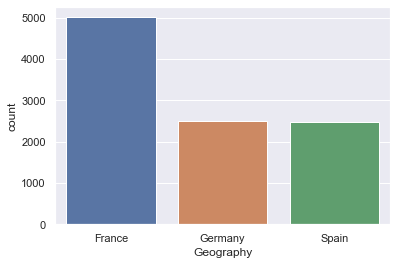

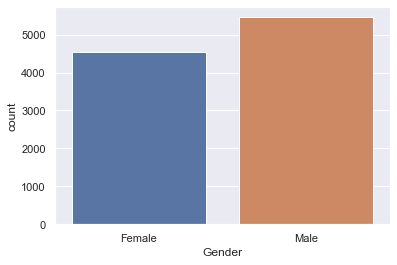

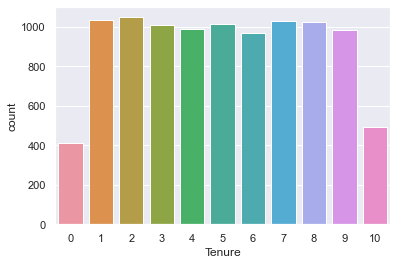

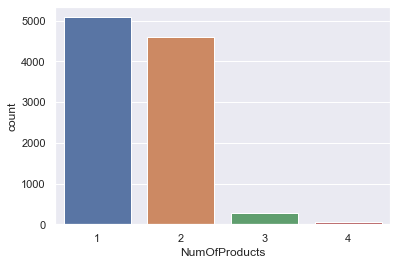

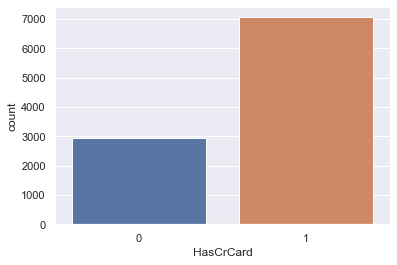

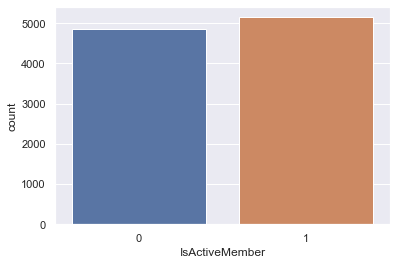

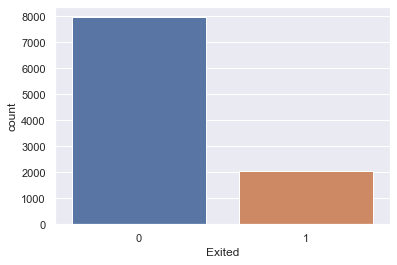

In [456]:
for i in cat_cols:
    sns.countplot(x=i,data=bank_ch)
    plt.show()

## Observations on Goegraphy

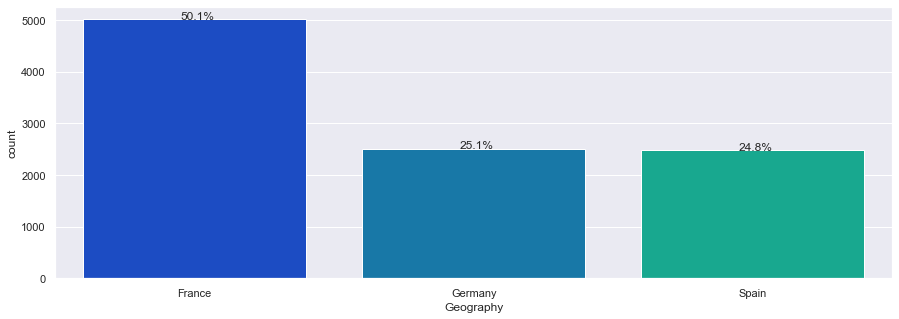

In [457]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Geography"],palette='winter')
perc_on_bar(ax,bank_ch["Geography"])

* Geographic distribution shows 50.1% of the customers are from France. 25.1% are from Germany.24.8% are from Spain

## Observations on Gender

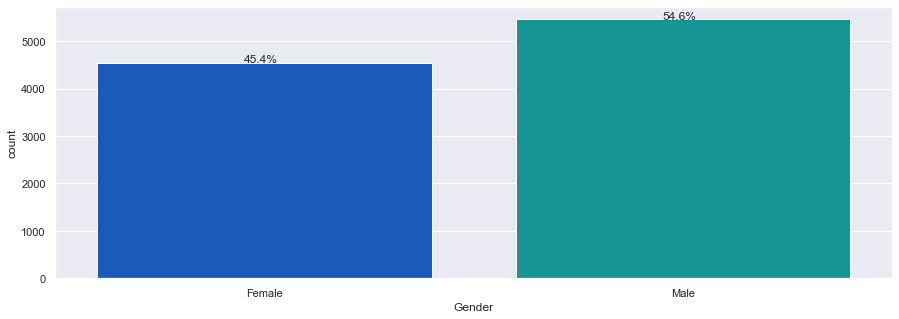

In [458]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Gender"],palette='winter')
perc_on_bar(ax,bank_ch["Gender"])

* Gender distribution shows 54.6% of the customers are Male. 45.4% are Female.

## Observations on NumOfProducts

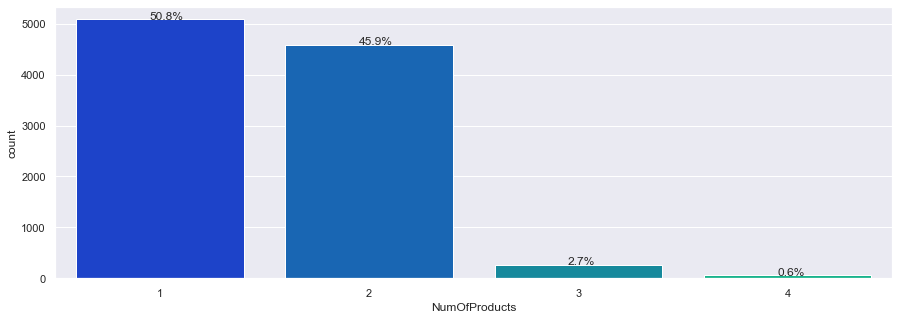

In [459]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["NumOfProducts"],palette='winter')
perc_on_bar(ax,bank_ch["NumOfProducts"])

* 50.1% of the customers have only one product. 45.9% have 2 products. Remaining very minor percentages, 2.7 in 3 and 0.6 in 4 products.

## Observations on HasCrCard

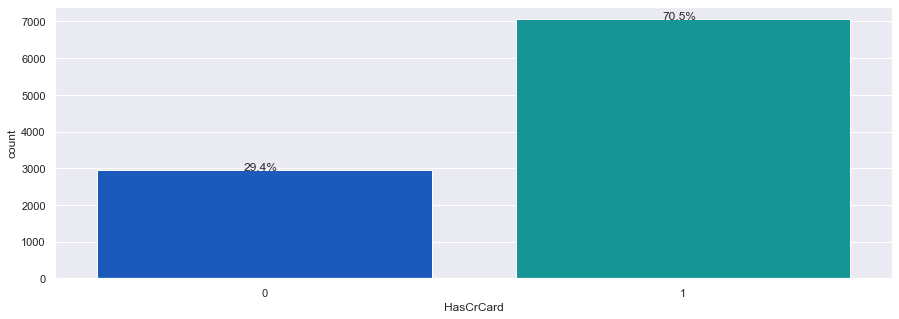

In [460]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["HasCrCard"],palette='winter')
perc_on_bar(ax,bank_ch["HasCrCard"])

* Majority, 70.5% customers have a credit card. 29.4% do not have one.

## Observations on IsActiveMember

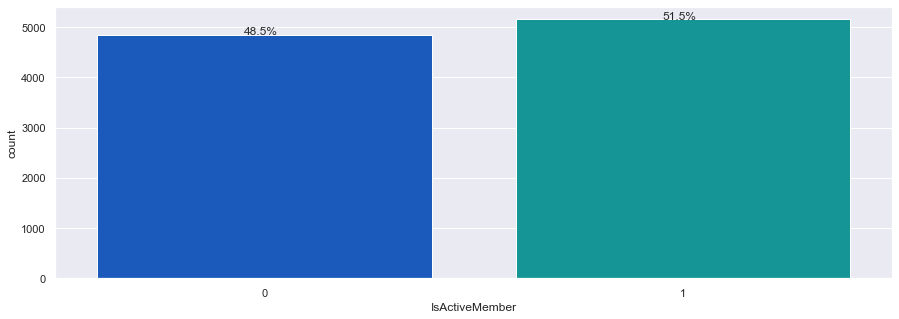

In [461]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["IsActiveMember"],palette='winter')
perc_on_bar(ax,bank_ch["IsActiveMember"])

* 51.5% of customers are active. 48.5% are not active. That's a huge percentage of not active customers. Might need to pay attention.

## Observations on Exited

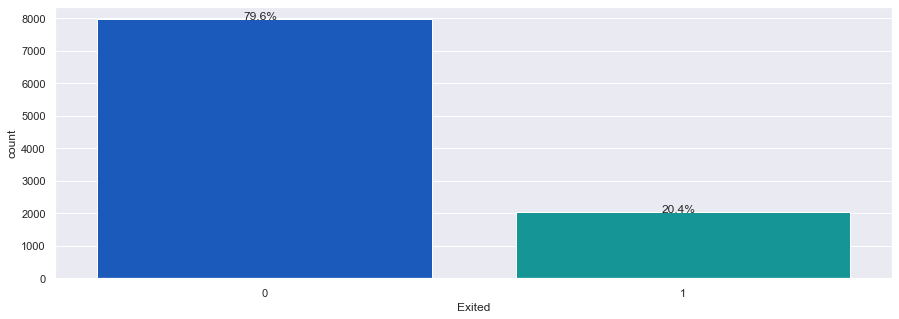

In [462]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Exited"],palette='winter')
perc_on_bar(ax,bank_ch["Exited"])

* Fairly high amount of people (20.4%) left the bank. Our goal for this data nalysis to find ways to reduce the churn rate. 

## Bivariate Analysis

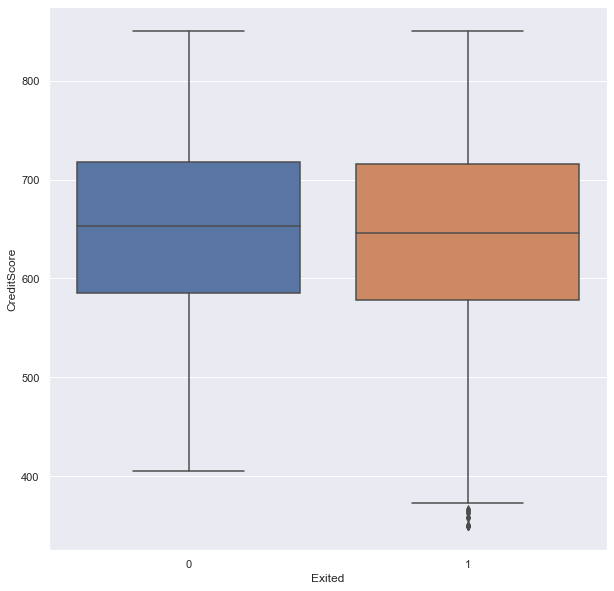

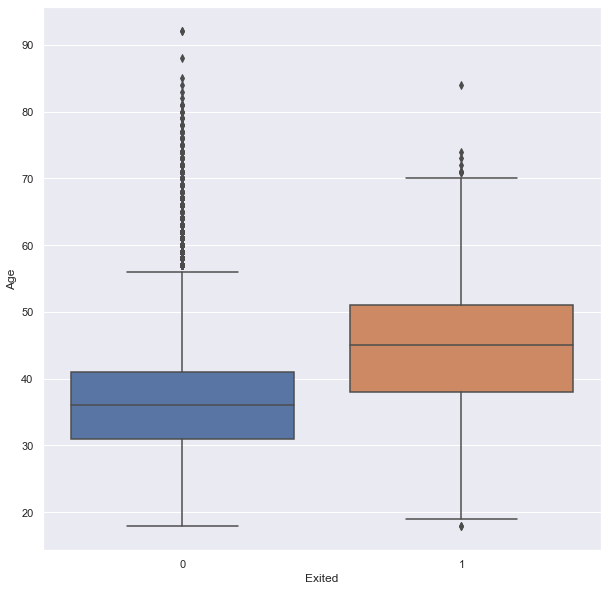

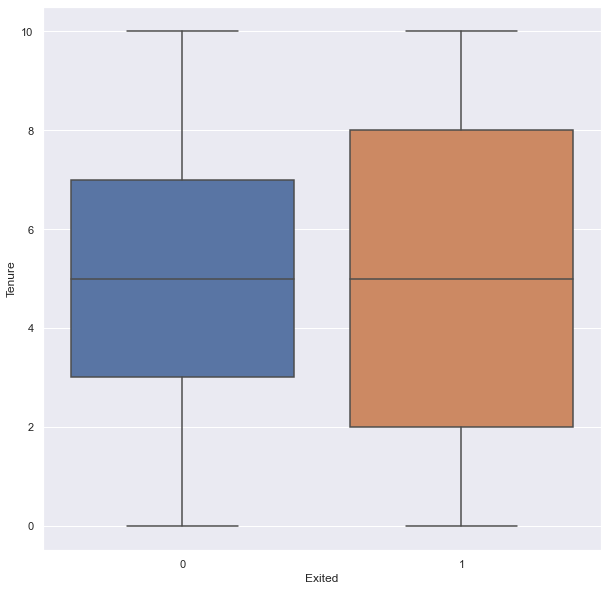

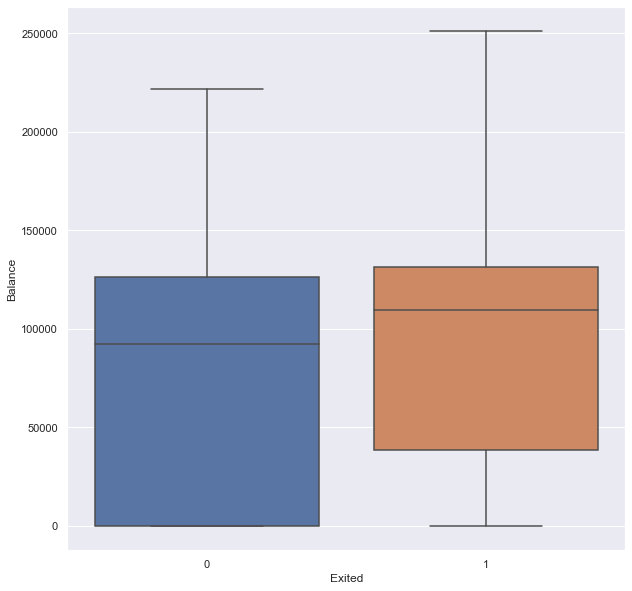

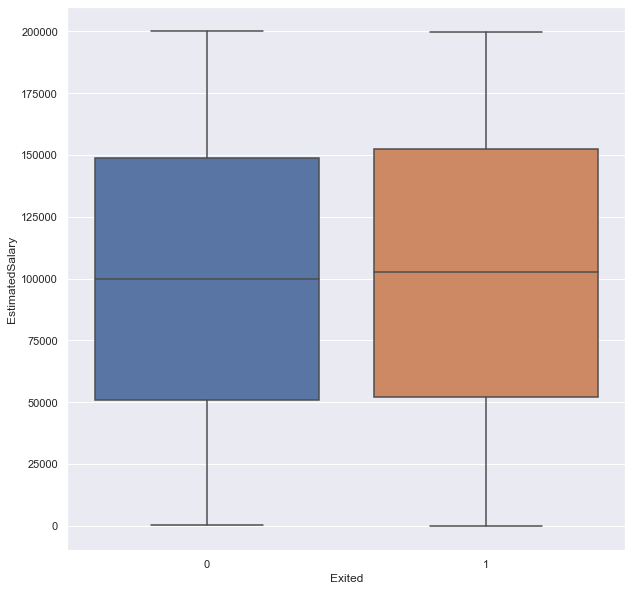

In [463]:
#Box plot of Target variable versus continuous variables

for i in ['CreditScore','Age', 'Tenure','Balance','EstimatedSalary']:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=bank_ch,x='Exited',y=i)
    plt.show()


### Insights: 
1. distribution of Credit Score versus Exited status seems almost similar for both staying customers and exited customers. Exited status has few outliers in the lower end and has slightly longer lower quartile. 

2. Most people who are leaving seem to be of age between 38-50 and those who tsay most fall between the ages 30-40. Staying customers have lot of outliers at higher end till 92. exited customers have fewer outliers in the older side and couple in the younger side.
3. Exited customers were around longer but also they(majority) range from 2-8 years. Majority staying customers were from 3-7 years. Both classes cover the full range if tenures.

4. Staying customers range from 0- 125K account balance. Majority exited customers range from 40K to 125K balance. 

3. Estimated Salary Range for both classes show extremely similar distribution. We may be bale to drop this column from the model.

## Pair Plot to show the relation between features. 
## Diagonal of the Pair Plot will show the kernal density estimate (shape of data distribution) for a variable.

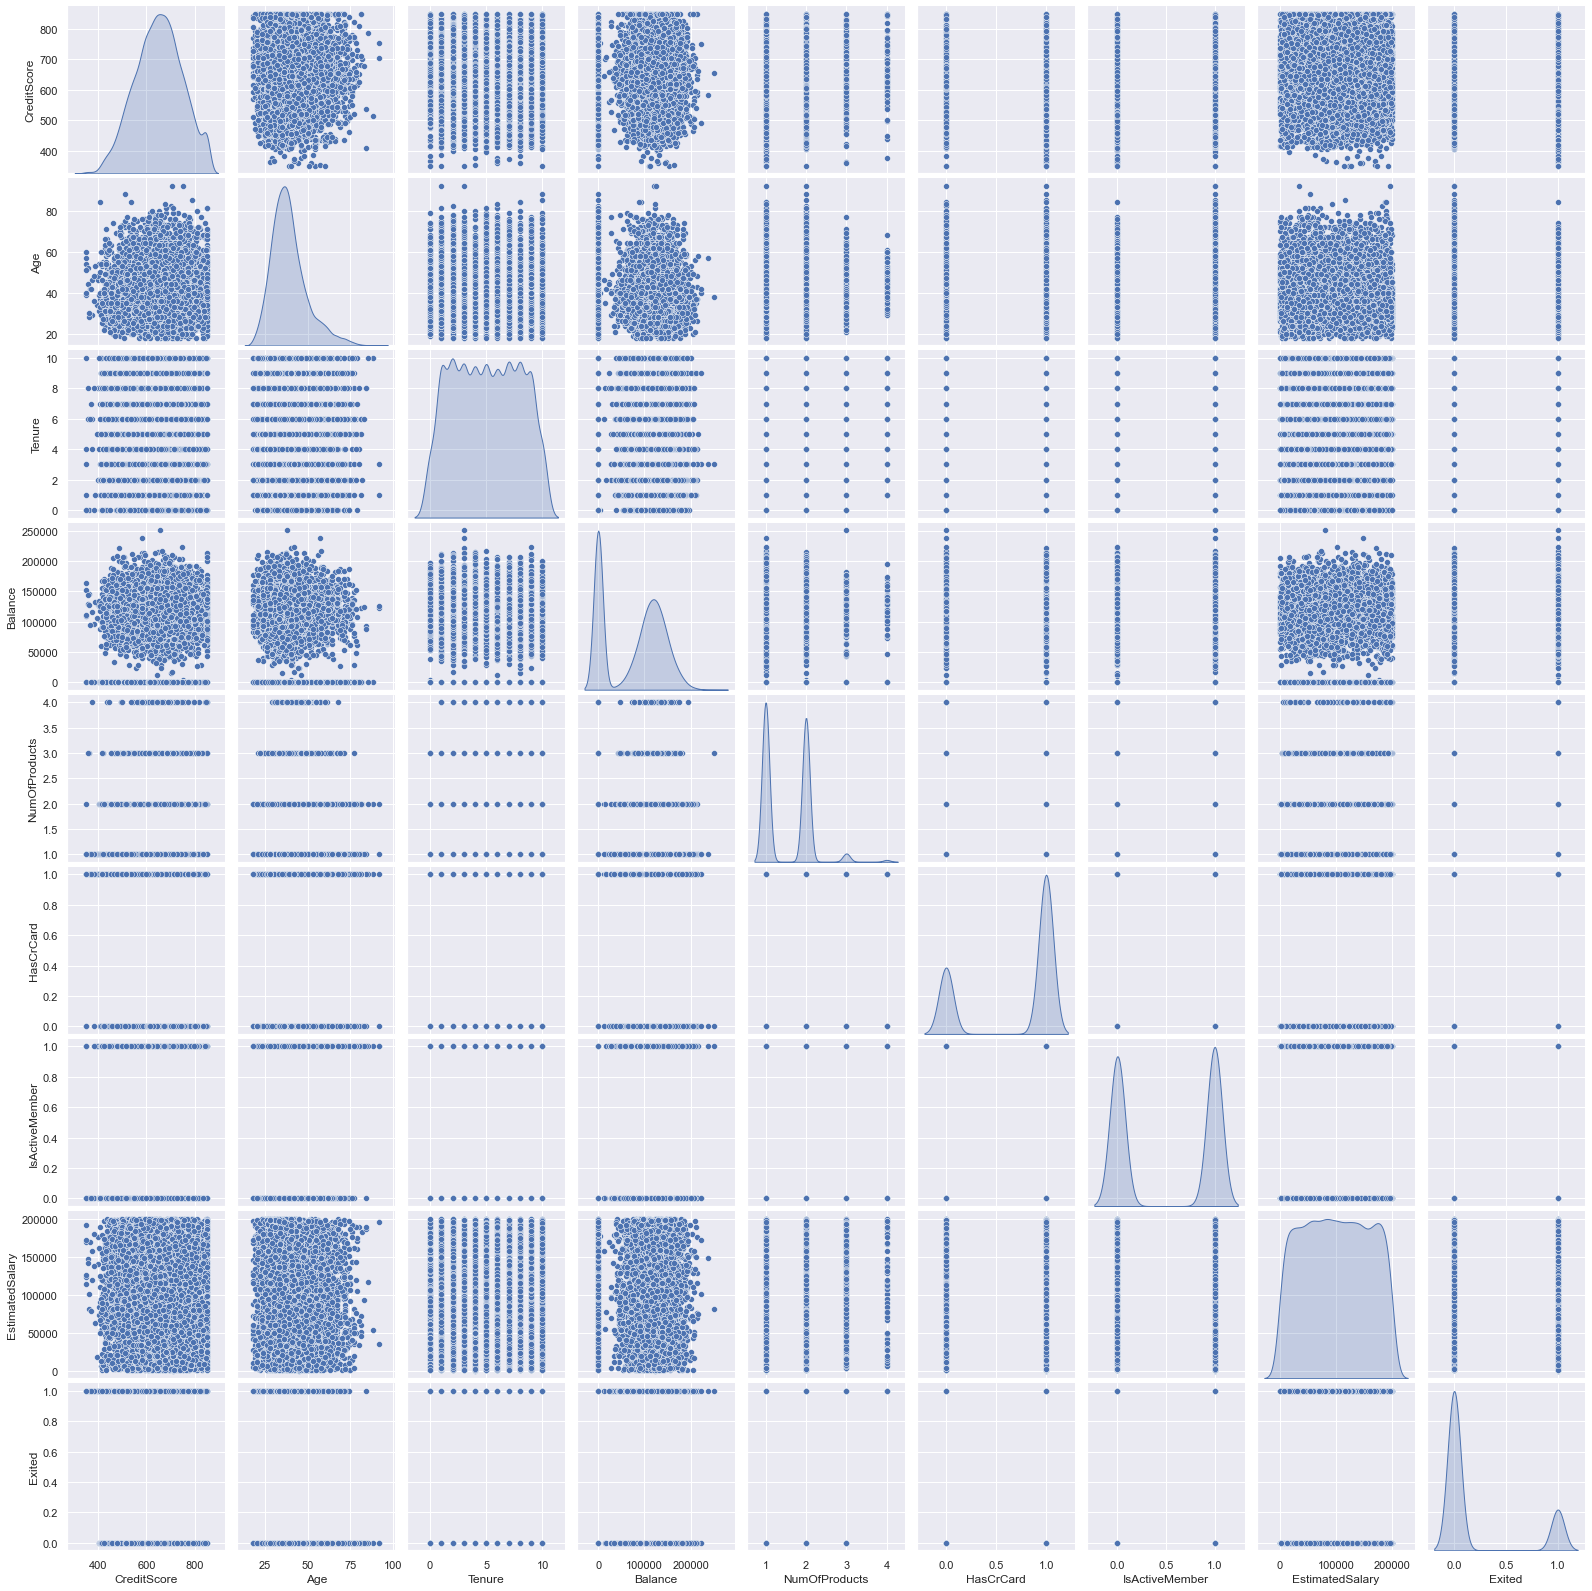

In [464]:
plot=sns.pairplot(bank_ch , diag_kind = 'kde')
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
#    ax.set_xlabel(l, fontsize=18)
    m = ax.get_ylabel()
#    ax.set_ylabel(m, fontsize=18)
plt.show()

* Target variable seem to be not having a linear relation with independent variables. Independent variables also don't have linear relation among them.

## Heatmap of correlation between different numerical features.

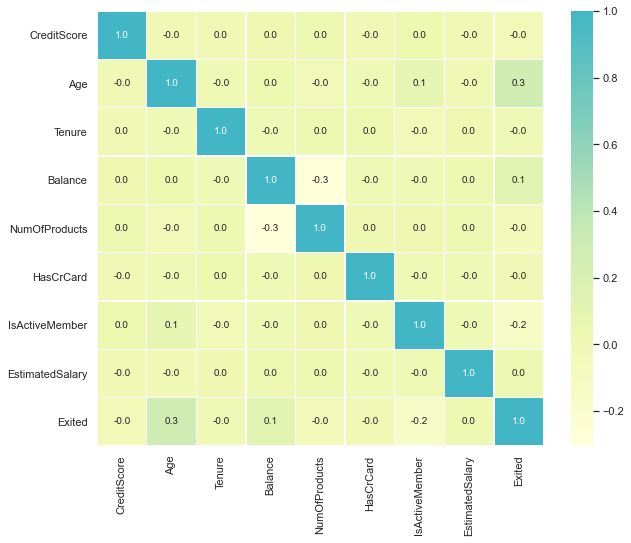

In [465]:
# heatmap of correlation between different numerical features.
# Darker the color higher the correlation
plt.figure(figsize=(10,8))
sns.heatmap(bank_ch.corr(), annot=True, cmap="YlGnBu",linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

* No significant correlation is seen among faetures.

## Customer Profile.

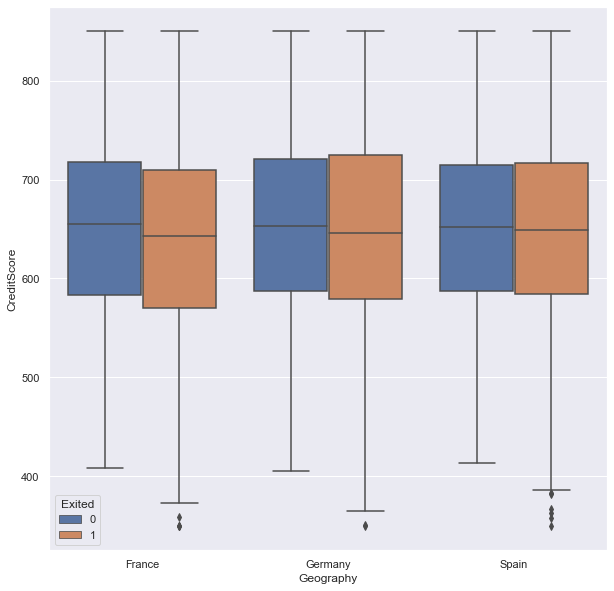

<Figure size 720x720 with 0 Axes>

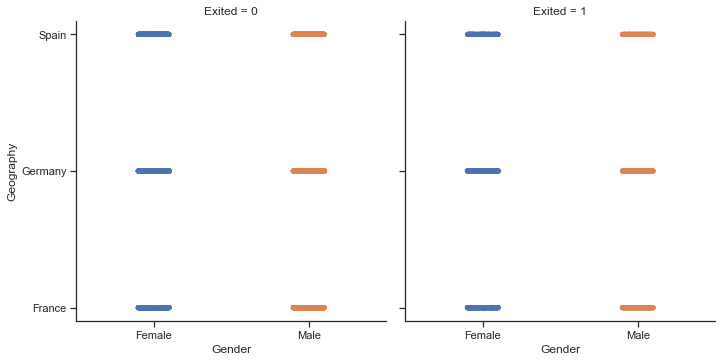

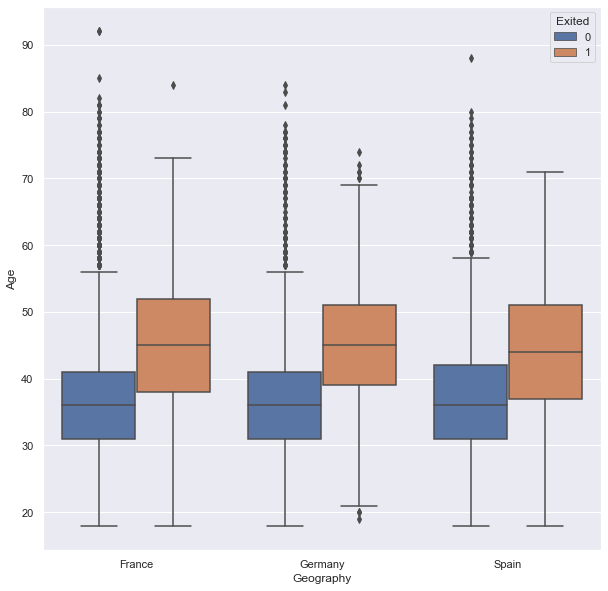

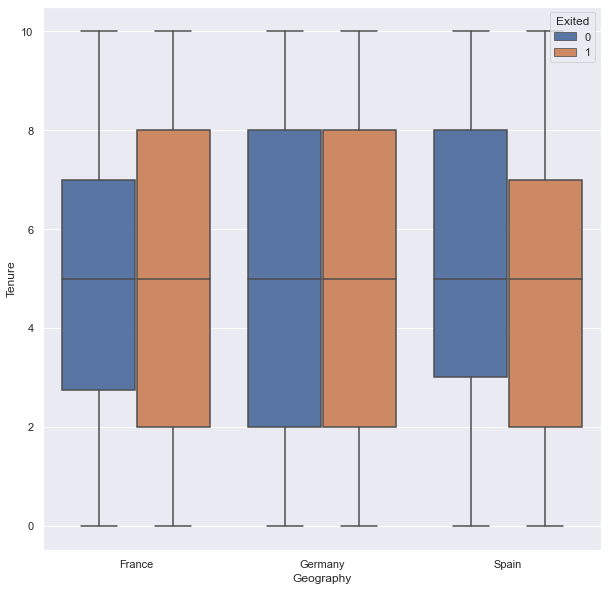

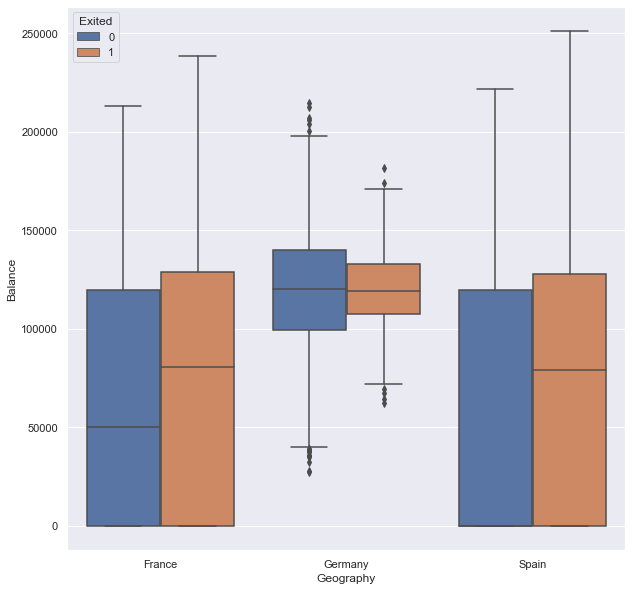

<Figure size 720x720 with 0 Axes>

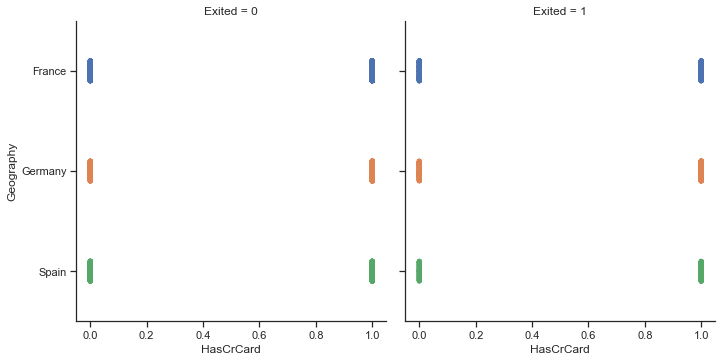

<Figure size 720x720 with 0 Axes>

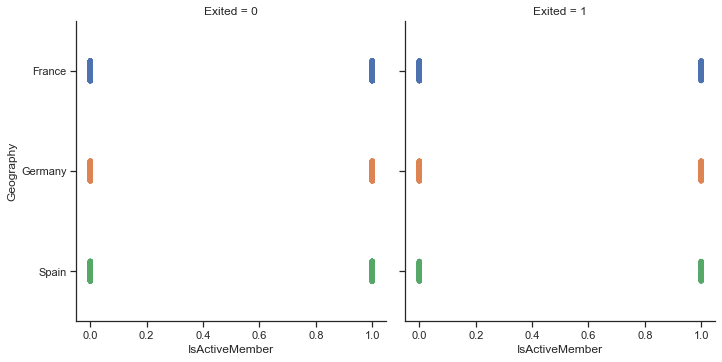

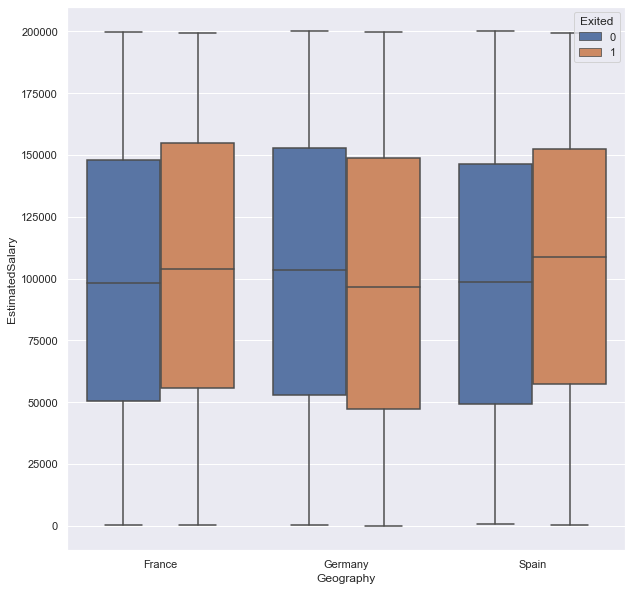

In [466]:
#Customer Profile based on Geography. Plots to help with.
for i in bank_ch.columns:
    sns.set(color_codes=True)
    if i =='CreditScore' or i == 'Age' or i == 'Tenure' or i == 'Balance' or i == 'EstimatedSalary':
        plt.figure(figsize=(10,10))
        sns.boxplot(data=bank_ch,x='Geography',y=i, hue = 'Exited' )
        plt.show()
    elif i == 'Gender' or i == 'NumOfProduct' or i == 'HasCrCard' or i == 'IsActiveMember':
        plt.figure(figsize=(10,10))
        sns.set_theme(style="ticks")
        sns.catplot(x = i , y = 'Geography', col = 'Exited', data = bank_ch)
        plt.show()

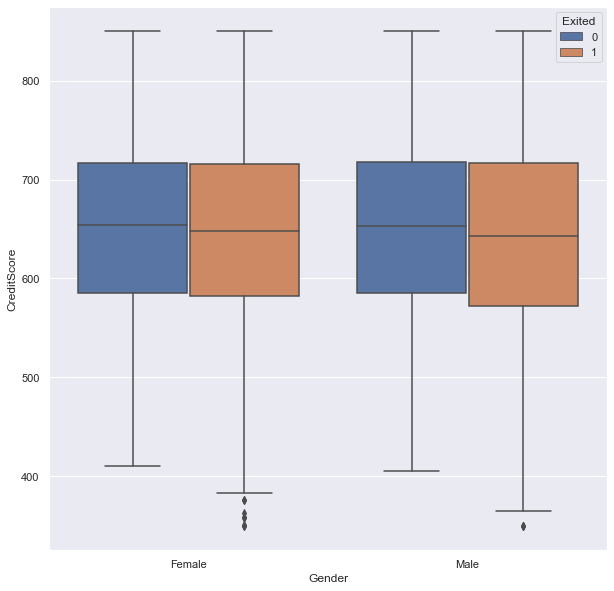

<Figure size 720x720 with 0 Axes>

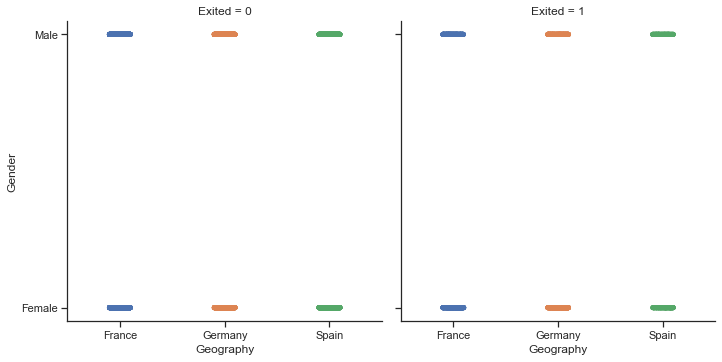

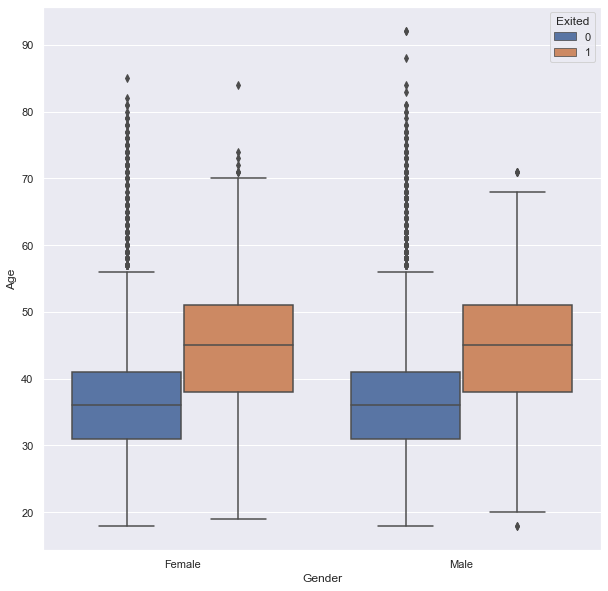

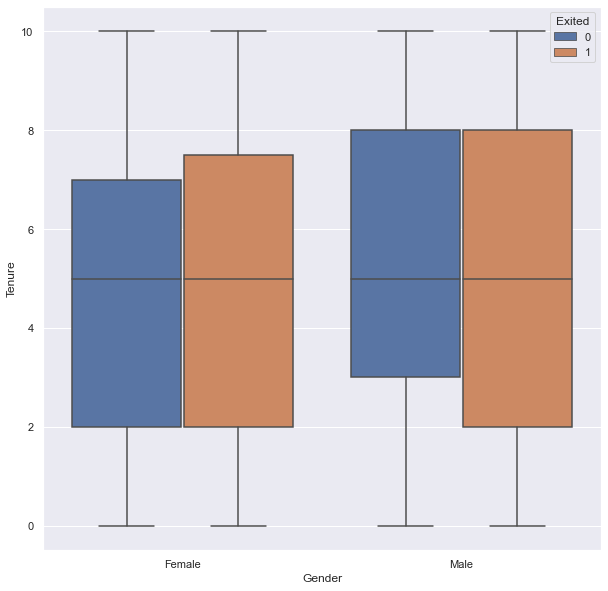

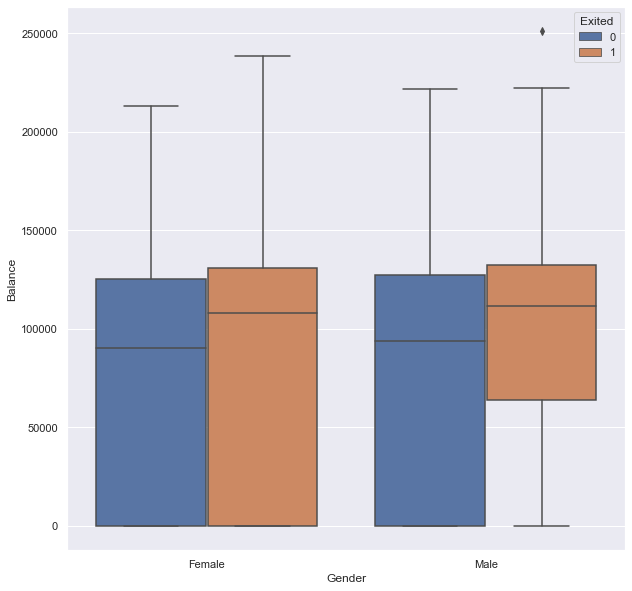

<Figure size 720x720 with 0 Axes>

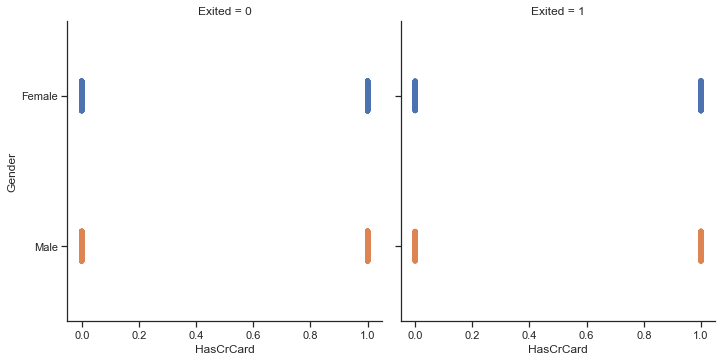

<Figure size 720x720 with 0 Axes>

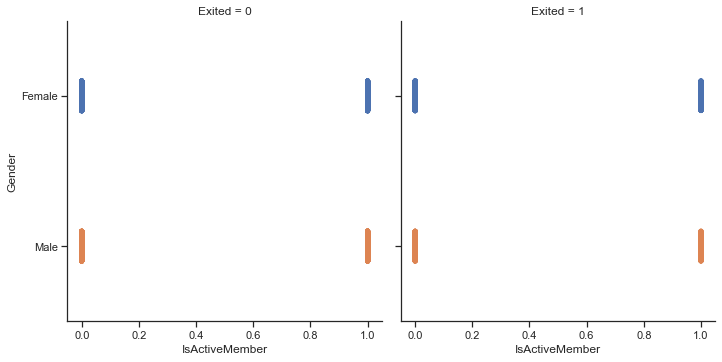

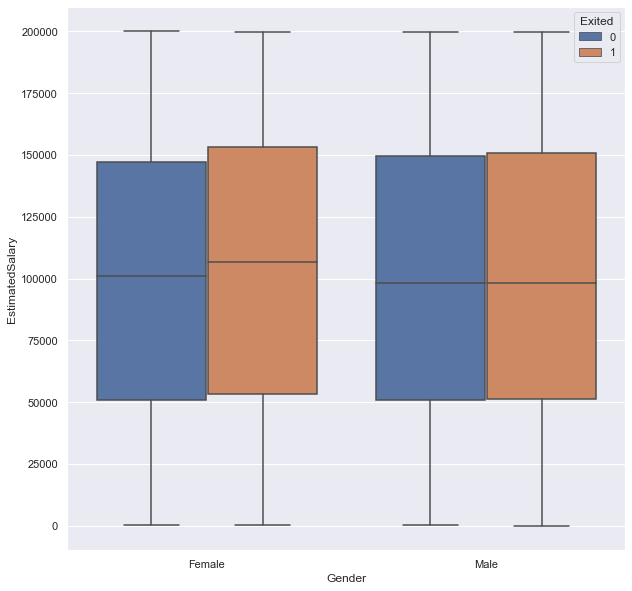

In [467]:
#Customer Profile based on Gender. Plots to help with that.
for i in bank_ch.columns:
    sns.set(color_codes=True)
    if i =='CreditScore' or i == 'Age' or i == 'Tenure' or i == 'Balance' or i == 'EstimatedSalary':
        plt.figure(figsize=(10,10))
        sns.boxplot(data=bank_ch,x='Gender',y=i, hue = 'Exited' )
        plt.show()
    elif i == 'Geography' or i == 'NumOfProduct' or i == 'HasCrCard' or i == 'IsActiveMember':
        plt.figure(figsize=(10,10))
        sns.set_theme(style="ticks")
        sns.catplot(x = i , y = 'Gender', col = 'Exited', data = bank_ch)
        plt.show()

### Insights: 
### Customer Profile of those customers who are from different geography and different  gender


### For different Geographies, profile of people who are exiting.

    France : Customers with credit score less than or equal to 410 are higly likely to leave. Above 710 are more
            likely to stay than leave. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 42 and above till 73 are more likely to leave. staying customers have many outliers as 
            well from 55 to 92. Above 73 highly likely to stay. Customers seem to be oldest in France
            People who stayed longer with bank than 7 years more likely to leave.Also with tenure less than 3 likely to 
            leave.
            Both classese are poresent in customers with lower balance. Above 120K Balance more likely to leave.
            Estimated Salary for those who leave from 55k to 155K but for those who stay 50K to 150K
            Customers with 3 products are more likely to leave. Those with 4 products are not staying at all.
            
    Germany : Customers with credit score less than or equal to 410 are higly likely to leave. bove 720 are more
            likely to leave than stay. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 42 and above till 73 are more likely to leave. staying customers have many outliers as 
            well from 55 to 85. Above 69 highly likely to stay barring some outliers. Below 21 highly likely to stay 
            barring couple outliers.
            People with any tenure is equally likely to stay or leave in Germany.
            People have higher account balance in Germany than FRance or Spain. People with less than 110K balance and above 
            130K Balance much more likely to stay. More than 175K and below 75K rarely leave.
            Estimated Salary below 52k likely to leave.Above 150K likely stay.
            Customers with 3 products are more likely to leave. Those with 4 products are not staying at all.
            
            
    Spain : Customers with credit score less than or equal to 410 are almost certain to leave. Other credit scores are 
            equally likely to stay or leave.
            Most customers from Age 42 and above till 71 are more likely to leave. staying customers have many outliers as 
            well from 59 to 89. Above 71 highly likely to stay. 
            People who stayed longer with bank than 7 years more likely to stay. Also with tenure less than 3 likely to 
            leave.
            Both classese are poresent in customers with lower balance. Above 125K Balance more likely to leave.Above 225K 
            will most definitely leave.
            Estimated Salary for those who leave from 55k to 155K but for those who stay 50K to 148K. Below 55k likely to 
            stay. Above 148 more likely to stay.
            Tenure 10 less likely to leave
            There are few customers with 4 products and they are not staying at all.    
            
### Gender-wise profile of those who are exiting.

    Female : Customers with credit score less than or equal to 410 are higly likely to leave. Above 710 are more
            likely to stay than leave. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 38 and above till 52 are more likely to leave. staying customers have many outliers as
            well from 55 to 85. Above 55 to 70 likely to leave than stay. Above 70 highly likely to stay. 
            People who stayed longer with bank than 7 years more likely to leave. Other tenures same chance of leaving or 
            staying.
            Both classese are present in customers with lower balance. Above 150K Balance more likely to leave.
            Estimated Salary has no significance in churn rate.
            Customers with 3 products are more slightly more likely to leave.Those with 4 products are not staying at all.
            
     Male : Customers with credit score less than or equal to 410 are higly likely to leave. Below 590 little higher 
            chance of leaving 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 38 and above till 52 are more likely to leave. staying customers have many outliers as
            well from 55 to 92. Above 56 to 68 likely to leave than stay. Above 68 highly likely to stay. 
            One outlier with 250K balance also left.
            People with below 3 tenure are likely to leave.  Other tenures same chance of leaving or staying.
            People with lower account balance less than 70K highly likely to stay. More than 125K likely leave.
            Estimated Salary has no significance in churn rate.
            Those with 4 products are not staying at all.
            
    

### Illustrate the insights based on EDA
- Key meaningful observations from Bivariate analysis

**Key meaningful observations on the relationship between variables**

- Insights have been provided throughout the EDA (refer to code above this cell) at different places. 
- Above cell has customer profile and gives lot of information about data and relation between different variables. One example is above cells explain what type of people in different geography and different Gender are likely to leave/stay.

## Data Pre-processing

- Split the target variable and predictors - Split the data into train and test - Rescale the data

- Below many steps are preparing the data, scaling etc.

In [468]:
## One hot encoding to convert categorical variables into numeric.
bank_ch=pd.get_dummies(bank_ch, columns=['Gender', 'Geography'])
bank_ch.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


In [469]:
## Shape to see number of columns.
bank_ch.shape

(10000, 14)

In [470]:
## Split data into independent and dependent variables.
X=bank_ch.drop("Exited", axis=1)
y=bank_ch["Exited"]


In [471]:
#Verifyng split data
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [472]:
#Verifyng split data
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [473]:
## Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

#### Rescaling data

In [474]:
## Scaling the data so that it is ready for neural networks.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [475]:
## Function to create confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Model Building
-  Build Fully Connected Neural Network.

### Creating a model

Keras model object can be created with Sequential class

In [476]:
## To get consistent results from Keras. Use the below code to set random seed
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [477]:
#initialize the model
model = Sequential()

### Adding layers and activations

Keras layers can be added to the model

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added


In [478]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 13,activation='relu'))   # input of 14 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (churn r not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))

### Model compile using optimizers and loss functions.

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated


In [479]:
# Create optimizer with default learning rate
# Compile the model
# Using optimizer as Adam. Using loss function, binary_crossentropy as it is a classification problem.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [480]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 16)                224       
_________________________________________________________________
dense_197 (Dense)            (None, 24)                408       
_________________________________________________________________
dropout_123 (Dropout)        (None, 24)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_199 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 25        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
___________________________________________________

In [481]:
##Verifying lengths of Test and train X and y values.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [482]:
#fitting the model. Validation split lets you train on train set and validate on validation set.
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 765us/step - loss: 0.4823 - accuracy: 0.7991 - val_loss: 0.4563 - val_accuracy: 0.7919
Epoch 2/10
427/427 [==============================] - 0s 568us/step - loss: 0.4377 - accuracy: 0.8047 - val_loss: 0.4415 - val_accuracy: 0.8056
Epoch 3/10
427/427 [==============================] - 0s 593us/step - loss: 0.4218 - accuracy: 0.8116 - val_loss: 0.4288 - val_accuracy: 0.8144
Epoch 4/10
427/427 [==============================] - 0s 561us/step - loss: 0.4033 - accuracy: 0.8238 - val_loss: 0.4123 - val_accuracy: 0.8288
Epoch 5/10
427/427 [==============================] - 0s 566us/step - loss: 0.3860 - accuracy: 0.8350 - val_loss: 0.3840 - val_accuracy: 0.8413
Epoch 6/10
427/427 [==============================] - 0s 563us/step - loss: 0.3723 - accuracy: 0.8389 - val_loss: 0.3705 - val_accuracy: 0.8438
Epoch 7/10
427/427 [==============================] - 0s 568us/step - loss: 0.3592 - accuracy: 0.8483 - val_loss: 0.3712 - val_accuracy:

### Plotting the train and test loss

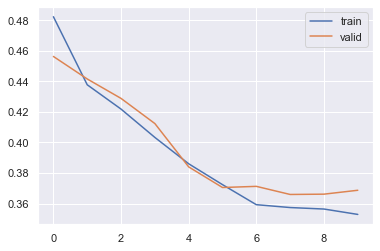

In [483]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


* Test loss is higher than train loss. We will need to generalize the model to avoid that.

## Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [484]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 460us/step - loss: 0.3621 - accuracy: 0.8520


#### Let's make the confusion Matrix

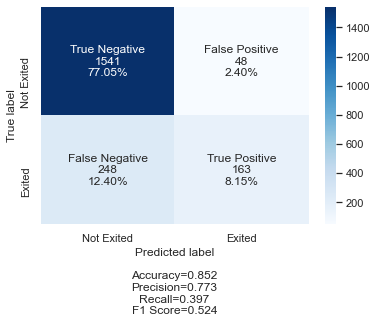

In [485]:
## Confusion Matrix on unseentest set

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Precision and Accuracy are high. However Recall is low.  As we are trying to identify people who will leave. False ngatives we should reduce. So I think Recall is important. False positive means we identified them wrongly as churners. Even if bank tries to improve their customer experience without the necessity, that's good in the long term. So we can live with false positives, I believe.**

### Finding the optimal threshold using ROC-AUC 

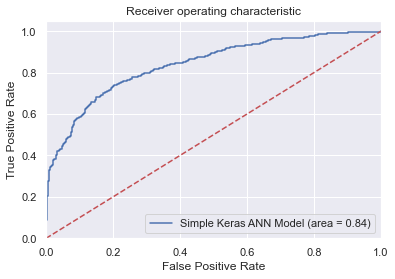

Roc Auc Score: 0.8388831978979572


In [488]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ANN_roc_auc = roc_auc_score(y_test,model.predict(X_test) )
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Simple Keras ANN Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:", ANN_roc_auc)

In [489]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.1632000058889389 with G-Mean: 0.7677
FPR: 0.2033, TPR: 0.7397


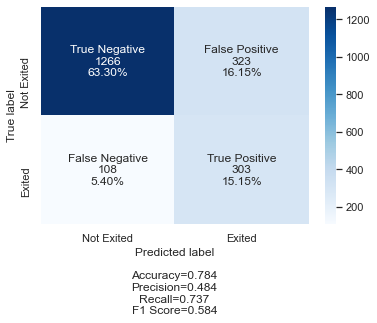

In [490]:
## Redrawing Confusion Matrix using optimal threshold

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]> 0.1632:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* The Recall improved at the expense of Precision. F1 Score improved. But let's try tuning hyper parameters to improve performance.

#### Tuning hyper parameters to improve performance.

In [491]:
## Training Multi-layer perceptron with 2 hidden layers
## Tried different values for weight initialization parameters , activation, optimizer, learning rate 
## and settled in below values giving the best possible Recall and F1 rate. 

## adding earlystopping callback. This will improve performance by stopping at an earlier time than specified epochs when 
## loss stops to come down and flattens.
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
model2 = Sequential()

#Initializing the weights uisng he_normal 
model2.add(Dense(65, input_shape=(13, ), kernel_initializer='he_normal', activation='tanh'))

## Dropout for avoiding overfitting.
model2.add(Dropout(0.5))
model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
optimizer = tf.keras.optimizers.Adamax(0.01)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
history_mod2= model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40,
                         callbacks=[es], shuffle=True, verbose=1)

Epoch 1/40
10/10 [==============================] - 0s 12ms/step - loss: 0.9117 - accuracy: 0.6048 - val_loss: 0.5344 - val_accuracy: 0.7969
Epoch 2/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7837 - val_loss: 0.5135 - val_accuracy: 0.7937
Epoch 3/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7795 - val_loss: 0.4590 - val_accuracy: 0.8025
Epoch 4/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7803 - val_loss: 0.4348 - val_accuracy: 0.8069
Epoch 5/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7780 - val_loss: 0.4247 - val_accuracy: 0.8112
Epoch 6/40
10/10 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7842 - val_loss: 0.4201 - val_accuracy: 0.8144
Epoch 7/40
10/10 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7870 - val_loss: 0.4188 - val_accuracy: 0.8169
Epoch 8/40
10/10 [=

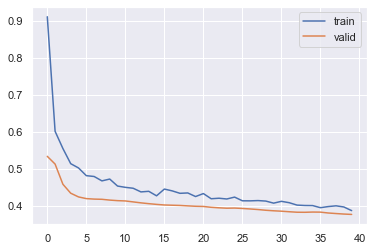

In [492]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_mod2.history)
hist['epoch'] = history_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


* Test loss is lower than train loss. That's a good sign. Also test loss is settling down in a stright line fashion..

## Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [493]:
score = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 493us/step - loss: 0.3695 - accuracy: 0.8510


##### Confusion Matrix

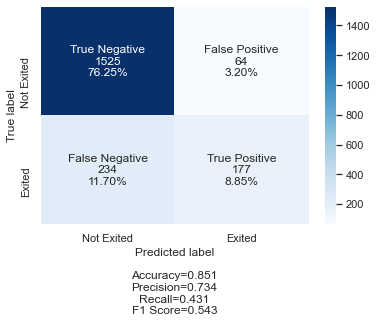

In [494]:
## Confusion Matrix on unseen test set

y_pred2 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* Let's tune to find optimal threshold for improving the performance.

### Finding the optimal threshold using ROC-AUC 

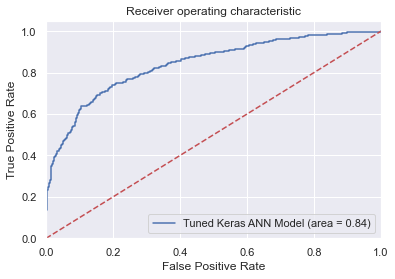

Roc Auc Score: 0.8388831978979572


In [497]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Tuned_ANN_roc_auc = roc_auc_score(y_test,model2.predict(X_test) )
fpr, tpr, thresholds = roc_curve(y_test, model2.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Tuned Keras ANN Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:", ANN_roc_auc)

In [498]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.26829999685287476 with G-Mean: 0.7704
FPR: 0.1976, TPR: 0.7397


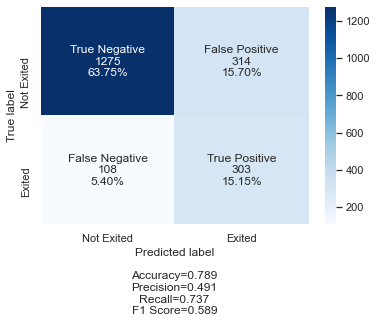

In [499]:
## Redrawing Confusion Matrix using best threshold on unseen test set

y_pred2 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.26829:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* This Recall score looks better but Precision still bad. F1 score improved little. But we will see if we can do even better by using class weights.

In [500]:
## Calculating class weight for imbalanced classes of tragte variable
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

In [501]:
# Fitting the model using class weights
history_mod21= model2.fit(X_train, y_train, validation_split=0.2, batch_size=700,
                          epochs=40, class_weight=class_weights, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.8247 - val_loss: 0.4303 - val_accuracy: 0.8081
Epoch 2/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7398 - val_loss: 0.5388 - val_accuracy: 0.7262
Epoch 3/40
10/10 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.7189 - val_loss: 0.4745 - val_accuracy: 0.7725
Epoch 4/40
10/10 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7631 - val_loss: 0.4467 - val_accuracy: 0.7887
Epoch 5/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7702 - val_loss: 0.4664 - val_accuracy: 0.7837
Epoch 6/40
10/10 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7455 - val_loss: 0.4842 - val_accuracy: 0.7694
Epoch 7/40
10/10 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7491 - val_loss: 0.4725 - val_accuracy: 0.7713
Epoch 8/40
10/10 [==

- Make confusion matrix on this

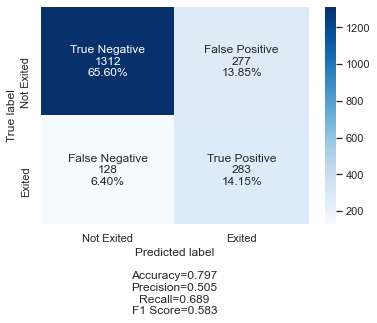

In [503]:
## Make Confusion Matrix on unseen test set

y_pred21 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred21[i]>0.5:
        y_pred21[i]=1 
    else:
        y_pred21[i]=0



cm2=confusion_matrix(y_test, y_pred21)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* This Recall score looks much better but with a reduction in Precision. We will see if we can do better by finding optimal threshold .

### Finding the optimal threshold using ROC-AUC 

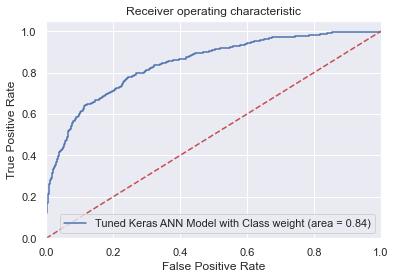

Roc Auc Score: 0.8436421933640494


In [504]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

CW_ANN_roc_auc = roc_auc_score(y_test,model2.predict(X_test) )
fpr, tpr, thresholds = roc_curve(y_test, model2.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Tuned Keras ANN Model with Class weight (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:", CW_ANN_roc_auc)

In [505]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.4174000024795532 with G-Mean: 0.7671
FPR: 0.2442, TPR: 0.7786


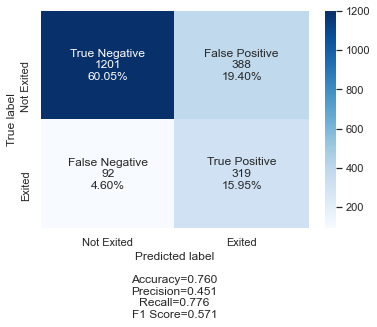

In [506]:
## redrawing Confusion Matrix using new threshold 

y_pred21 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred21[i]>0.4174:
        y_pred21[i]=1 
    else:
        y_pred21[i]=0



cm2=confusion_matrix(y_test, y_pred21)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* Tuning improved Recall. However Precision and F1 Score went down by the threshold tuning. 

### Now let's drop esimated salary as discussed during EDA and see if any improvement happens.

In [372]:
X2 = X.drop("EstimatedSalary", axis = 1)

In [374]:
X2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,1,0,1,0,0
3,699,39,1,0.00,2,0,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,1,0,0,0,1


In [375]:
## Split data into train and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=.3, random_state=7)

## Scaling the data so that it is ready for neural networks.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [388]:
#Training Multi-layer perceptron with 2 hidden layers - using data with EstimatedSalary dropped - Use class weights also.  

#adding earlystopping callback
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
model3 = Sequential()
#Initializing the weights uisng hue_normal 
model3.add(Dense(65, input_shape=(12, ), kernel_initializer='he_normal',
                     activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.011)
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
history_mod3= model3.fit(X_train2, y_train2, validation_split=0.2, batch_size=800, epochs=40, class_weight=class_weights, 
                         callbacks=[es], shuffle=True, verbose=1)

Epoch 1/40
7/7 [==============================] - 0s 17ms/step - loss: 0.9916 - accuracy: 0.5761 - val_loss: 0.6069 - val_accuracy: 0.6743
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6068 - val_loss: 0.6258 - val_accuracy: 0.6650
Epoch 3/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.6557 - val_loss: 0.6038 - val_accuracy: 0.7200
Epoch 4/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6082 - accuracy: 0.6545 - val_loss: 0.6142 - val_accuracy: 0.6664
Epoch 5/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5976 - accuracy: 0.6620 - val_loss: 0.5631 - val_accuracy: 0.7300
Epoch 6/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5931 - accuracy: 0.6955 - val_loss: 0.5539 - val_accuracy: 0.7300
Epoch 7/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.6921 - val_loss: 0.5624 - val_accuracy: 0.7279
Epoch 8/40
7/7 [=================

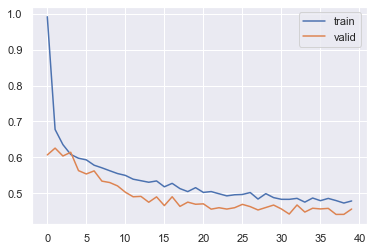

In [389]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_mod3.history)
hist['epoch'] = history_mod3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

* Test loss is lower than train loss. That's a good sign. Test loss is kind of wavy.That's a drawback.

In [390]:
## Evaluating the score
score = model3.evaluate(X_test2, y_test2)

94/94 [==============================] - 0s 423us/step - loss: 0.4589 - accuracy: 0.8123


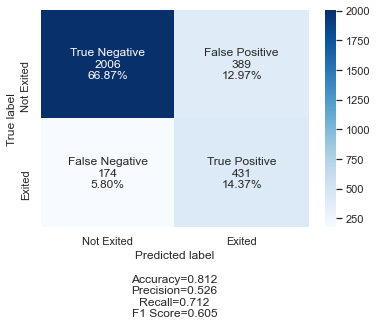

In [391]:
## Confusion Matrix on unseen test set

y_pred3 = model3.predict(X_test2)
for i in range(len(y_test2)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0

cm3=confusion_matrix(y_test2, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* The Recall is good with a better Precision. We can settle for this model.

### Finding the optimal threshold using ROC-AUC 

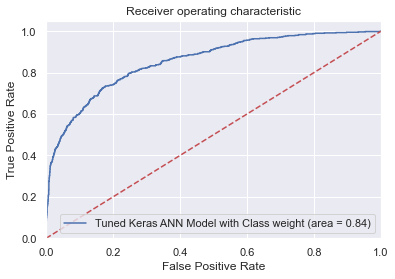

Roc Auc Score: 0.8436421933640494


In [507]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Below name suggests, CW_ANN_FE stands for class weighted ANN model with feature elimintaion
CW_ANN_FE_roc_auc = roc_auc_score(y_test2,model3.predict(X_test2) )
fpr, tpr, thresholds = roc_curve(y_test2, model3.predict(X_test2))
plt.figure()
plt.plot(fpr, tpr, label='Tuned Keras ANN Model with Class weight (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Roc Auc Score:", CW_ANN_roc_auc)

In [508]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.4869000017642975 with G-Mean: 0.7778
FPR: 0.1775, TPR: 0.7355


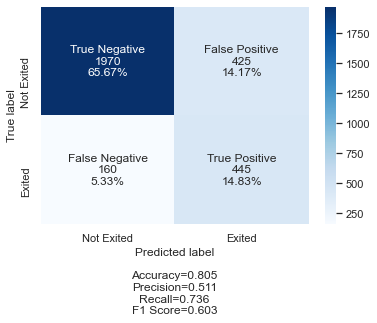

In [509]:
## Redrawing Confusion Matrix on unseen test set using best threshold

y_pred3 = model3.predict(X_test2)
for i in range(len(y_test2)):
    if y_pred3[i]>0.4869:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0

cm3=confusion_matrix(y_test2, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* The Recall is better but Precision went down a bit. F1 SCore slightly went down by threshold tuning. So we settle for the previous model.

## Insights and Recommendations:

- When comparing all models looking at the important metrics of Recall and Precision on test data reflected in F1 score, The second from last model with the use of class weights and using data after EstimatedSalary variable dropped is giving the best results.F1 score is 60.5%. They make sure most marketing is done on possibe churners without targeting non_churners as much. These models are also generalizing well, by comparable performance on both train and test data. Threshold tuning on this model reduced the F1 score a bit, so we can leave the last model outof picture.

- If marketing cost is minimal such as emailing customers, we can focus on recalll only thus avoiding false negatives. That's to avoid identifying churners as non-churners. Precision may be low in this case that means false positives could be high. But it is okay to market such cuitomers via email as the expenses are cheap. In this case model2 with class weight and threshold tuning works best.This model uses all features initially included. This has a recall of 77.6% but Recall 45.1% only. You are likely to identify most churners and be able to proactively take steps to avoid losing their business. But False positives could be high. So increases marketing cost. 

- Steps to take for avoiding losing customers. Use the below customer segmentation/profiling to target churners identified by certain characteristics such as less credit score, certain age group etc. They may be specific to a certain Geography or Gender. Give them offers such Fee reduction , cash back bonus, 0 APR on credit cards etc. to make them stay. However if people with low credit scores are unlikely pay credit card balances, bank can ignore those churners if they wish. There are many other markers of likely churners as descxribed below. Use those to Target them and take steps for retaining those customers.

### Insights: 
### Customer Profile of those customers who are from different geography and different  gender


### For different Geographies, profile of people who are exiting.

    France : Customers with credit score less than or equal to 410 are higly likely to leave. Above 710 are more
            likely to stay than leave. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 42 and above till 73 are more likely to leave. staying customers have many outliers as 
            well from 55 to 92. Above 73 highly likely to stay. Customers seem to be oldest in France
            People who stayed longer with bank than 7 years more likely to leave.Also with tenure less than 3 likely to 
            leave.
            Both classese are present in customers with lower balance. Above 120K Balance more likely to leave.
            Estimated Salary for those who leave from 55k to 155K but for those who stay 50K to 150K
            Customers with 3 products are more likely to leave. Those with 4 products are not staying at all.
            
    Germany : Customers with credit score less than or equal to 410 are higly likely to leave. bove 720 are more
            likely to leave than stay. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 42 and above till 73 are more likely to leave. staying customers have many outliers as 
            well from 55 to 85. Above 69 highly likely to stay barring some outliers. Below 21 highly likely to stay 
            barring couple outliers.
            People with any tenure is equally likely to stay or leave in Germany.
            People have higher account balance in Germany than FRance or Spain. People with less than 110K balance and above 
            130K Balance much more likely to stay. More than 175K and below 75K rarely leave.
            Estimated Salary below 52k likely to leave.Above 150K likely stay.
            Customers with 3 products are more likely to leave. Those with 4 products are not staying at all.
            
            
    Spain : Customers with credit score less than or equal to 410 are almost certain to leave. Other credit scores are 
            equally likely to stay or leave.
            Most customers from Age 42 and above till 71 are more likely to leave. staying customers have many outliers as 
            well from 59 to 89. Above 71 highly likely to stay. 
            People who stayed longer with bank than 7 years more likely to stay. Also with tenure less than 3 likely to 
            leave.
            Both classese are present in customers with lower balance. Above 125K Balance more likely to leave.Above 225K 
            will most definitely leave.
            Estimated Salary for those who leave from 55k to 155K but for those who stay 50K to 148K. Below 55k likely to 
            stay. Above 148 more likely to stay.
            Tenure 10 less likely to leave
            There are few customers with 4 products and they are not staying at all.    
            
### Gender-wise profile of those who are exiting.

    Female : Customers with credit score less than or equal to 410 are higly likely to leave. Above 710 are more
            likely to stay than leave. 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 38 and above till 52 are more likely to leave. staying customers have many outliers as
            well from 55 to 85. Above 55 to 70 likely to leave than stay. Above 70 highly likely to stay. 
            People who stayed longer with bank than 7 years more likely to leave. Other tenures same chance of leaving or 
            staying.
            Both classese are present in customers with lower balance. Above 150K Balance more likely to leave.
            Estimated Salary has no significance in churn rate.
            Customers with 3 products are more slightly more likely to leave.Those with 4 products are not staying at all.
            
     Male : Customers with credit score less than or equal to 410 are higly likely to leave. Below 590 little higher 
            chance of leaving 
            Other credit scores pretty much equally likely to stay or leave.
            Most customers from Age 38 and above till 52 are more likely to leave. staying customers have many outliers as
            well from 55 to 92. Above 56 to 68 likely to leave than stay. Above 68 highly likely to stay. 
            One outlier with 250K balance also left.
            People with below 3 tenure are likely to leave.  Other tenures same chance of leaving or staying.
            People with lower account balance less than 70K highly likely to stay. More than 125K likely leave.
            Estimated Salary has no significance in churn rate.
            Those with 4 products are not staying at all.
            
    